In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tTvTO0sNg5RDR2K34I08")
project = rf.workspace("rubikscubesolverinstancesegmentation").project("instance-segmentation-tpjgl")
version = project.version(2)
dataset = version.download("yolov8-obb")
                

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ----- ---------------------------------- 5.0/38.8 MB 25.0 MB/s eta 0:00:02
   ---------- ----------------------------- 9.7/38.8 MB 23.6 MB/s eta 0:00:02
   -------------- ------------------------- 13.6/38.8 MB 21.5 MB/s eta 0:00:02
   ------------------ --------------------- 17.6/38.8 MB 21.0 MB/s eta 0:00:02
   ---------------------- ----------------- 21.5/38.8 MB 20.6 MB/s eta 0:00:01
   -------------------------- ------------- 25.7/38.8 MB 20.4 MB/s eta 0:00:01
   ------------------------------ --------- 29.6/38.8 MB 20.1 MB/s eta 0:00:01
   ---------------------------------- ----- 33.8/38.8 MB 20.1 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.8 MB 20.1 MB/s eta 0:00:01
   ---------------------------------------- 38.8/38.8 MB 19.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.6 MB ? eta -:-


Extracting Dataset Version Zip to Instance-Segmentation-2 in yolov8-obb:: 100%|██████████| 75/75 [00:00<00:00, 443.40it/s]


In [3]:
from ultralytics import YOLO
import os

# 1. Choix du modèle (YOLOv8 Nano - Segmentation)
model = YOLO("yolov8n-seg.pt")  # ← préentraîné, segmentation

In [4]:
# 2. Configuration de l'entraînement
results = model.train(
    data="yolo_config.yaml",     # fichier de config de ton dataset
    epochs=50,                   # nombre d'épochs
    imgsz=640,                   # redimensionnement des images
    batch=4,                     # taille du batch (tu peux adapter selon la RAM)
    name="rubiks_faces_seg",    # nom du projet
    project="runs",             # dossier de sortie
    verbose=True                 # pour avoir les logs complets
)


Ultralytics 8.3.99  Python-3.13.2 torch-2.6.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=yolo_config.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs, name=rubiks_faces_seg3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning C:\Users\HP\Documents\cours_inge_3D\Rubik-s-cube-resolver\IA\dataset\train\labels.cache... 26 images, 0 backgrounds, 1 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]

train: WARNING  C:\Users\HP\Documents\cours_inge_3D\Rubik-s-cube-resolver\IA\dataset\train\images\6_jpg.rf.94075a8d5e3eb3ac1d7f71c873618439.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.0080245]



val: Scanning C:\Users\HP\Documents\cours_inge_3D\Rubik-s-cube-resolver\IA\dataset\valid\labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]

Plotting labels to runs\rubiks_faces_seg3\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\rubiks_faces_seg3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.785      5.981      2.741      2.063         26        640:  29%|██▊       | 2/7 [00:22<00:56, 11.32s/it]


KeyboardInterrupt: 

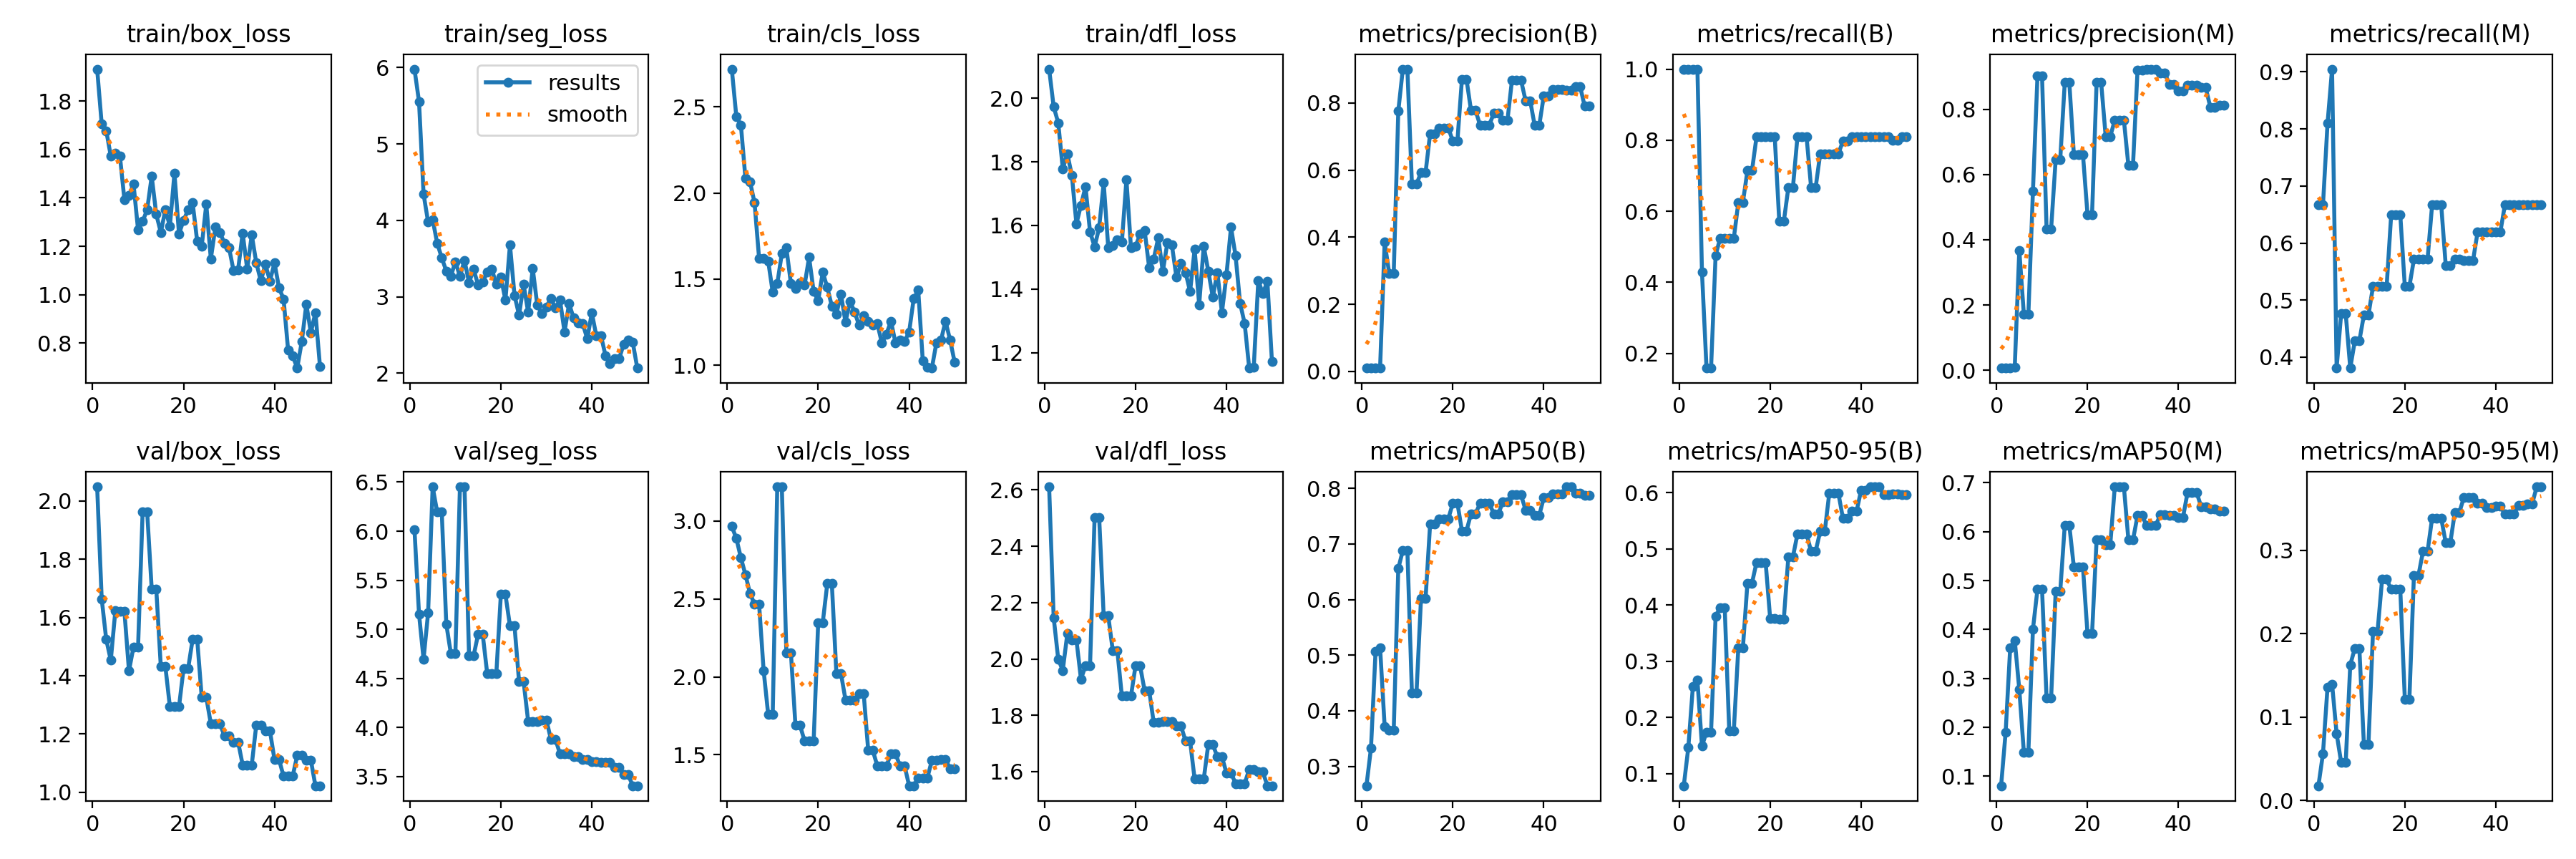

In [2]:
# 3. Visualisation des résultats
from IPython.display import Image, display

# Affiche la courbe d'apprentissage (losses, mAP, etc.)
result_img_path = os.path.join(results.save_dir, "results.png")
display(Image(filename=result_img_path))

In [12]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Chemin du modèle entraîné et de l'image
model = YOLO("runs/rubiks_faces_seg2/weights/best.pt")
img_path = "dataset/valid/images/30_jpg.rf.d3b4bdd50356a906b98f7b4506187ed9.jpg"

# Prédiction
results = model.predict(source=img_path, save=False, imgsz=640, conf=0.25)
detected = results[0]

# Affichage des infos
print("Nombre de détections :", len(detected.boxes))
for box in detected.boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    print(f"Classe : {detected.names[cls]}, Confiance : {conf:.2f}")

# Sauvegarde de l'image annotée
annotated_img = detected.plot()
save_path = "predicted.jpg"
cv2.imwrite(save_path, annotated_img)
print(f"Image annotée sauvegardée dans : {save_path}")


image 1/1 c:\Users\HP\Documents\cours_inge_3D\Rubik-s-cube-resolver\IA\dataset\valid\images\30_jpg.rf.d3b4bdd50356a906b98f7b4506187ed9.jpg: 640x640 3 faces, 305.0ms
Speed: 20.6ms preprocess, 305.0ms inference, 38.6ms postprocess per image at shape (1, 3, 640, 640)
Nombre de détections : 3
Classe : face, Confiance : 0.91
Classe : face, Confiance : 0.74
Classe : face, Confiance : 0.72
Image annotée sauvegardée dans : predicted.jpg
